In [1]:
from pythonMD import manager
from unum.units import *
import matplotlib.pyplot as plt

# test single particle in 1d

## plot location

1000 0.1710616808931886 0.7105560100941268 1248.8457922135221 1249.5563482236164
2000 0.5962433319213599 2.476675552134945 1247.0796682561697 1249.5563438083045
3000 1.2778254847407893 5.307831498516291 1244.2485052318718 1249.556336730388
4000 2.2146416442876093 9.199178462041873 1240.3571485399511 1249.5563270019932
5000 3.4050884947748865 14.144056589595925 1235.4122580501662 1249.5563146397621
6000 4.847128643690191 20.134002960160313 1229.4222967046962 1249.5562996648566
7000 6.538294108694383 27.158766068694728 1222.3975160342118 1249.5562821029066
8000 8.47569054145619 35.20632337110072 1214.3499386128665 1249.5562619839673
9000 10.656002181188446 44.262901860220566 1205.2933374822526 1249.5562393424732


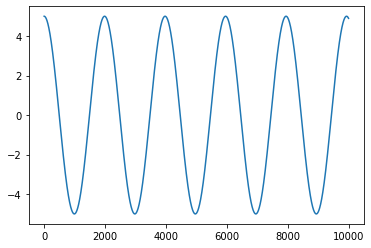

In [16]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)
myManager.initialize(positions=[[5.]], masses=1 * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"],
                          printStats=1000,savePositions=1,printMomentum=1)
plt.plot([pos[0] for pos in data["positions"]])

## plot histograms

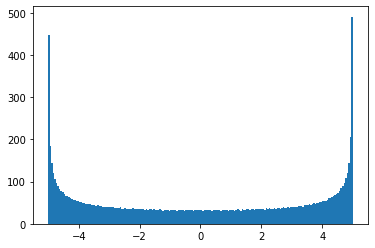

In [20]:
plt.hist([position[0][0] for position in data["positions"]],bins=200)
plt.show()

## Increase timestep and check energy convergence

In [4]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.00022530790724550157%
maximum change in energy for dt=3: 0.0015048891621146513%
maximum change in energy for dt=5: 0.006237384575224514%
maximum change in energy for dt=7: 0.007572650649433661%
maximum change in energy for dt=9: 0.018840541993059633%
maximum change in energy for dt=11: 0.026218451237095486%
maximum change in energy for dt=13: 0.03032698592410659%
maximum change in energy for dt=15: 0.05589498830951643%
maximum change in energy for dt=17: 0.04098043623382661%
maximum change in energy for dt=19: 0.0862477766384139%
start energy: 1249.505553201231


## Change initial position

In [5]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for p in range(1,11,2):

    myManager.initialize(positions=[[float(p)]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    data["positions"].sort()
    print(data["positions"][0],data["positions"][-1])

[[-1.]] [[0.99999999]]
[[-2.99999999]] [[2.99999998]]
[[-4.99999999]] [[4.99999996]]
[[-6.99999999]] [[6.99999995]]
[[-8.99999998]] [[8.99999993]]


# test 3 particles in 1d

## plot locations

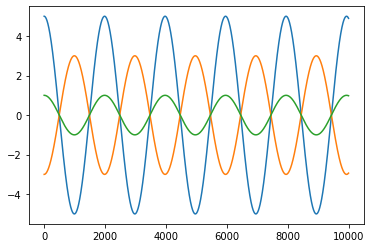

In [7]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)
myManager.initialize(positions=[[5.],[-3],[1.]], masses=1. * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"],
                          printStats=100000,savePositions=1)

first = [pos[0][0] for pos in data["positions"]]
second = [pos[1][0] for pos in data["positions"]]
third = [pos[2][0] for pos in data["positions"]]
plt.plot(first)
plt.plot(second)
plt.plot(third)

## Increase timestep and check energy convergence

In [8]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=1)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.],[-3],[1.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q"],
                              potentialEquations=["5e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.000225307907498952%
maximum change in energy for dt=3: 0.0015048891623706969%
maximum change in energy for dt=5: 0.006237384575349279%
maximum change in energy for dt=7: 0.007572650648647378%
maximum change in energy for dt=9: 0.018840541992950405%
maximum change in energy for dt=11: 0.02621845123762739%
maximum change in energy for dt=13: 0.030326985924201424%
maximum change in energy for dt=15: 0.05589498830970738%
maximum change in energy for dt=17: 0.04098043623371359%
maximum change in energy for dt=19: 0.08624777663839446%
start energy: 583.1025914939072


# test single particle in 3d

## plot location

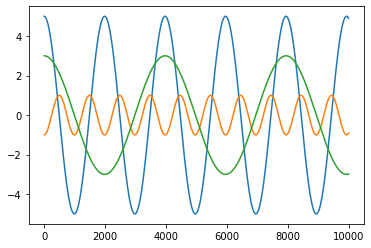

In [9]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=3)
myManager.initialize(positions=[[5.,-1.,3.]], masses=1. * U,
                     temperature=0 * K, types=[1])
data = myManager.run(10000,forceEquations=["-1e-5*q","-4e-5*q","-2.5e-6*q"],
                          potentialEquations=["5e-6*(q**2)","2e-5*(q**2)","1.25e-6*(q**2)"],
                          printStats=100000,savePositions=1)
plt.plot([pos[0] for pos in data["positions"]])

## Increase timestep and check energy convergence

In [10]:
myManager = manager(forces=["CoordsEquationPotential"],prop=[("VelocityVerlet",1.)],boundariesType=None,dimensions=3)

for dt in range(1,20,2):
    myManager.dt = dt
    myManager.initialize(positions=[[5.,-1.,3.]], masses=1. * U,
                         temperature=0 * K, types=[1])
    data = myManager.run(10000,forceEquations=["-1e-5*q","-4e-5*q","-2.5e-6*q"],
                              potentialEquations=["5e-6*(q**2)","2e-5*(q**2)","1.25e-6*(q**2)"],
                              printStats=100000,savePositions=1)
    totalRelativeEnergy = [abs((energy-data["totalEnergy"][0])*100/energy) for energy in data["totalEnergy"]]
    totalRelativeEnergy.sort()
    print(f"maximum change in energy for dt={dt}: {totalRelativeEnergy[-1]}%")
print(f"start energy: {data['totalEnergy'][0]}")

maximum change in energy for dt=1: 0.00018563557254874766%
maximum change in energy for dt=3: 0.0022293176063863155%
maximum change in energy for dt=5: 0.0050045776333109936%
maximum change in energy for dt=7: 0.012097119897689211%
maximum change in energy for dt=9: 0.016480614936501735%
maximum change in energy for dt=11: 0.020276393791655422%
maximum change in energy for dt=13: 0.042285470384283215%
maximum change in energy for dt=15: 0.045151444929085675%
maximum change in energy for dt=17: 0.06936485067290227%
maximum change in energy for dt=19: 0.09283245871260738%
start energy: 1561.7731430699057


## Use thermostat

### Langevin

10000 6.0879600972497 25.288168651955804 23.783679109779246 49.07184776173505
20000 0.5565690714396111 2.3118766089458562 6169.76081463352 6172.072691242465
30000 1358.5786211828565 5643.26387666935 9.748533571364446 5653.012410240714
40000 10.325390922629248 42.88960881441737 27.903361672901994 70.79297048731937
50000 159.7050772605395 663.382949924829 1594.1285445680148 2257.5114944928437
60000 102.55202083580146 425.9805841477521 2364.378559619021 2790.359143766773
70000 8.021815616493027 33.32101770778874 5250.210946185736 5283.531963893525
80000 22.947657767090096 95.31998083293884 1103.9988905867856 1199.3188714197245
90000 21.055406761694492 87.45994860672658 890.2068607490554 977.666809355782
100000 697.2882418656064 2896.395899061356 1035.0844390026873 3931.4803380640433
110000 349.08071551678023 1450.011476113602 451.30684637077684 1901.3183224843785
120000 22.64249409775381 94.05239198324978 1952.314185631666 2046.3665776149157
130000 91.42783677841553 379.77294841018244 200

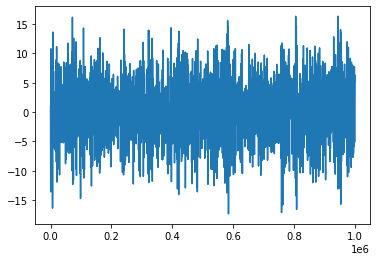

In [54]:
propagationScheme = [("Langevin",0.5),("VelocityVerlet",1.),("Langevin",0.5)]
myManager = manager(forces=["CoordsEquationPotential"],prop=propagationScheme,boundariesType=None,dimensions=1)
myManager.initialize(positions=[[1.]], masses=1 * U,
                     temperature=300 * K, types=[1])
data = myManager.run(1000000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"], temperature=300, gamma=1e-3,
                          printStats=10000,savePositions=1,printMomentum=1)
plt.plot([pos[0] for pos in data["positions"]])

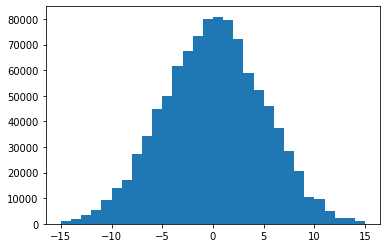

In [59]:
plt.hist([position[0][0] for position in data["positions"]],bins=30,range=[-15,15])
plt.show()

In [60]:
plt.hist([momentum[0][0] for momentum in data["momenta"]],bins=30,range=[-0.05,0.05])
plt.show()

In [64]:
import numpy
numpy.mean(data["T"])

302.38646440534075

### CSVR

10000 57.89952769502339 240.50305813958815 2.8439763937898284 243.34703453337795
20000 676.4438202366574 2809.8123404990274 324.70676113919563 3134.519101638223
30000 289.2468808762874 1201.4736937839225 2.0981262985749733 1203.5718200824974
40000 964.0462624724084 4004.4553650578905 693.9209651308366 4698.3763301887275
50000 43.6447295014333 181.29147740305362 91.99390626607273 273.28538366912636
60000 15.105998897909641 62.74729822213707 2135.7955354133132 2198.54283363545
70000 532.4441314460504 2211.6664332006044 2745.831536221858 4957.497969422463
80000 122.39155580341009 508.3900444962048 2325.9739108031044 2834.3639552993095
90000 1087.928656233214 4519.038052261525 1741.7229064566352 6260.76095871816
100000 280.71178508815854 1166.0206128991929 91.81664223745327 1257.837255136646
110000 716.0809114653526 2974.456890044782 930.2557652869308 3904.7126553317125
120000 832.3776752822632 3457.530387587465 2601.8800235686813 6059.4104111561455
130000 1.1314197984404384 4.699691558761

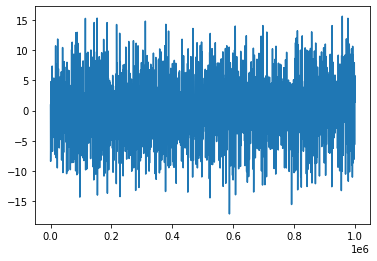

In [65]:
propagationScheme = [("VelocityVerlet",1.),("CSVR",1)]
myManager = manager(forces=["CoordsEquationPotential"],prop=propagationScheme,boundariesType=None,dimensions=1)
myManager.initialize(positions=[[1.]], masses=1 * U,
                     temperature=300 * K, types=[1])
data = myManager.run(1000000,forceEquations=["-1e-5*q"],
                          potentialEquations=["5e-6*(q**2)"], temperature=300, gamma=1e-3,
                          printStats=10000,savePositions=1,printMomentum=1)
plt.plot([pos[0] for pos in data["positions"]])

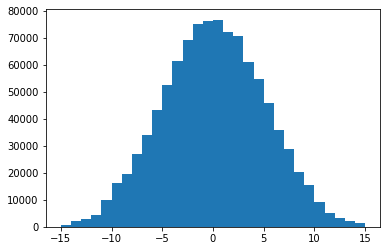

In [66]:
plt.hist([position[0][0] for position in data["positions"]],bins=30,range=[-15,15])
plt.show()

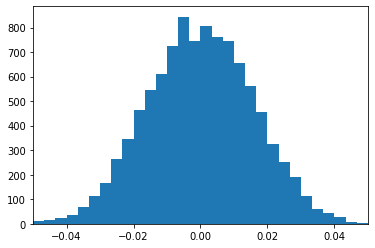

In [68]:
plt.hist([momentum[0][0] for momentum in data["momenta"]],bins=30,range=[-0.05,0.05])
plt.xlim([-0.05,0.05])
plt.show()